# 1. Introduction

This notebook demonstrates how to perform SE-to-gene-links analysis using sample data on the SEgene platform.
The sample data used is the processed RNA-seq data and ChIP-seq data (Tumor data) from [GSE156614](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE156614).

(The test data will be available in the SEgene repository after the publication of the paper.)

# 2. Preparation

## 2.1 Installation

This platform is currently available on Github in [Docker format and conda installation](https://github.com/hamamoto-lab/SEgene_test/tree/main/SE_to_gene_links#installation-guide). Please refer to the documentation there for installation.
We recommend the Docker format if your environment supports it.

## 2.2 Data preparation

### Required data

The following data will be used in this analysis tutorial.
(The detailed processing steps will be explained in the paper to be published after the publication)

- GSE156614_tumor_SE_table.tar.bz2

The table.txt file that contains the ROSE analysis results for the H3k27ac ChIP-seq data for the tumor samples in GSE156614

- GSE156614_tumor_2000000.tsv

P2GL analysis of the Tumor RNA-seq and ChIP-seq data from GSE156614. It contains information on the correlation between candidate enhancer regions and genes in the sample group.

- GSE156614_tumor_RNA.csv

This is a CSV file that summarizes the expression information for GSE156614 Tumor RNA-seq. (Only required for network analysis)

### Data arrangement

The default Docker folder structure is as follows. If setting up manually, place all data files in the ./data folder.

```
./data
|--GSE156614_ChIP_tumor.tsv
|--GSE156614_rna_tumor.csv
|--GSE156614_tumor_2000000.tsv
|--GSE156614_tumor_SE_table # Folders
./output
./notebook
```

## 2.3 Import

Import the analysis library.
This is done with the following code (not necessary if you are using Docker).

In [36]:
import SEgene_package.jupyter_wrapper
SEgeneJupyter = SEgene_package.jupyter_wrapper.SEgeneJupyter

This code imports the ``SEgene_package.jupyter_wrapper`` module and loads the class to be used for analysis.

# 3. Analysis

Let's proceed with the analysis.

## 3.1 Creating an analysis instance

First, we will import the analysis data and create an instance. We will use this instance to proceed with the subsequent analysis.

In [37]:
test_segene = SEgeneJupyter(
    p2g_file="./data/GSE156614_tumor_2000000.tsv", 　　# Peak to Gene Links file
    rna_info_file="./data/GSE156614_rna_tumor.csv",    # RNA
    rose_files_dir="./data/GSE156614_tumor_SE_table",  # Folder where the ROSE SE files are located
    FDR=0.05,                                          # False Discovery Rate
    r=0.5 　　　　　　　　　　　　　　　　　　　　　　 # Correlation coefficient r
)

The instance has been successfully created and is ready for data analysis. From now on, we will perform basic analysis using ``instance.operation method()``.

## 3.2 Filtering p2gl data Gene confirmation

In this case, we are filtering using the default settings of FDR=0.05 and r=0.5 as the threshold.
Only the correlation links between enhancer regions and genes with FDR and correlation values that exceed these two thresholds are extracted.
First, let's check what kind of genes are being extracted.

In [6]:
test_segene.count_genes()

The following 1554  genes were output:

UGT2B17
XIST
RPS4Y1
PAX8-AS1
PRKY
MIEN1
NKX2-1
ERBB2
DDX3Y
FOXG1
NKX2-1-AS1
TXLNG2P
PKDCC
TSIX
EIF1AY
DLX5
GSTM1
LOC102724103
URAD
POU6F2
LINC00960
TMSB4Y
LINC00278
THNSL2
KDM5D
BMP7
FRG1B
GRB7
GYG2P1
DMKN
HCG4B
TRIM72
UCA1
ORMDL3
RASGEF1A
SHC3
PAX8
HOXB3
DLX6
LOC101927382
CCND2
LINC00649
PSMD3
FAM3B
PRAC1
UTY
SOX2
NINL
TNNI3
PGAP3
TTTY14
FAM90A1
SFTA3
CYorf17
SLC35D3
HS6ST2
PRAC2
ALPK3
SOX1
APOBEC3B
LOC101928102
SLCO1B3
IRX2
HOXC11
AC006262.5
LINC00941
HOXB6
HOXB5
DSC3
LRRC3C
POU6F2-AS2
IGF2BP1
CHST4
VWA5B1
TACSTD2
ZFY
SHISA9
HOXB9
GATA2
ZIC2
MSX2
HOXA6
TTTY15
LOC102723854
PTF1A
HOXA11-AS
TMEM178B
GSDMA
LOC101928040
LOC102724023
HOXB13
SLC1A7
SHROOM2
TRIM29
C10orf126
ECHDC3
HOXB8
LOC100130502
C5orf38
RAP1GAP
ZNF90
FAM24B
HOXC12
DMRT2
TMPRSS5
LOC284837
MIR4458HG
SLC6A20
COLCA2
WISP3
ASIC2
TNFRSF19
UBXN10
SLC44A5
FIBCD1
DIO3OS
DMRTA2
UTS2
MYBPHL
GRAMD1B
LINC00540
WIPF3
ELF5
LINC00346
CARD11
TRNAV24
HAS2-AS1
CKMT2
PF4
ZNF486
TBX20
FZD10
SSTR5
LOC10

1554 genes were extracted.

For example, you can enter this gene list as a query in [g:Profiler](https://biit.cs.ut.ee/gprofiler/gost) and analyze it.

This time we have performed a simple extraction, but there are also options to count and sort all the links from a certain gene to multiple enhancers, for example.
For example, in the following options, the gene count (number of links) is counted and sorted, and the screen output and file saving are performed simultaneously.

In [7]:
test_segene.count_genes(
    show_gene_count=True,
    sort_genes=True,
    save_and_print=True,
    output_file="./output/count_genes.txt"
    
)

The following 1554  genes were output:

MIEN1 142
PSMD3 141
ERBB2 118
PGAP3 116
HOXB6 99
LOC102724103 96
ORMDL3 93
HOXB3 86
GRB7 83
HOXB4 74
HOXA10-AS 70
HOXA11-AS 70
HOTTIP 69
HOXB7 68
HOXA11 61
HOXB5 61
HOXB-AS3 60
DDX3Y 57
STARD3 52
HOXB9 48
LOC101928583 47
TRNAV24 47
UTY 46
MIR31HG 46
HOXB8 46
AXIN2 45
HOXB13 44
HOXA6 43
PRKY 43
PRAC1 43
CCND2 43
TMSB4Y 42
TTTY15 41
POFUT1 41
KDM5D 40
PMEPA1 38
NKX2-1 38
NKX2-1-AS1 38
EIF1AY 38
PLAGL2 37
TCAP 36
TXLNG2P 34
SOX2 33
RPS4Y1 32
SFTA3 31
HOXA9 31
ZFY 31
HOXA5 31
HOXA10 30
LINC00278 30
BMP4 30
COLCA2 29
ZIC2 29
HOXA7 29
GYG2P1 29
USP9Y 28
DLX5 27
CDK12 26
HOXC10 25
ZIC5 25
RP11-474D1.3 24
URAD 24
LINC00919 24
COLCA1 24
LOC102724272 24
DUSP4 24
PRAC2 23
TM9SF4 23
SHISA9 23
HUNK 23
TTTY14 23
APCDD1 23
HOXC6 22
KLK8 21
CCL3L3 21
IGF2BP3 21
SALL4 21
FRG1B 21
LOC101929374 20
PTK7 20
TRIM29 20
HOXC5 20
CCL4L1 20
TFAP2A 20
GNG4 20
CYorf17 20
ACTRT3 20
IFNE 20
BAHCC1 20
CHN2 19
RAP1GAP 19
MUC5B 19
LINC00589 18
VAV2 18
PPP1R1B 18
LOC101928102 18


## 3.3 Analyzing individual SE files

Next, let's try analyzing individual SE files.
The merge SE analysis that will be described later is a combination of these individual SE file analyses. By turning on text saving, it is also possible to obtain a log of how the SE files were actually filtered.
When creating an instance, if you do not specify a specific SE file, one file from the SE file (basically the first file when sorted) will be automatically selected.
(In this case, ``./GSE156614_tumor_SE_table/T01-H3K27ac_R1_peaks_AllEnhancers.table.txt`` is selected.

As shown in the output, 221 of the 1371 SE files were filtered.

Output Graph: Super Table - Coverage Ratio of SEs by Peak to Gene
Total SEs: 1371
SEs Not Covered: 1150
SEs Covered: 221
Saved summary text with filter flags to ./output/rose_se_filtered.txt.


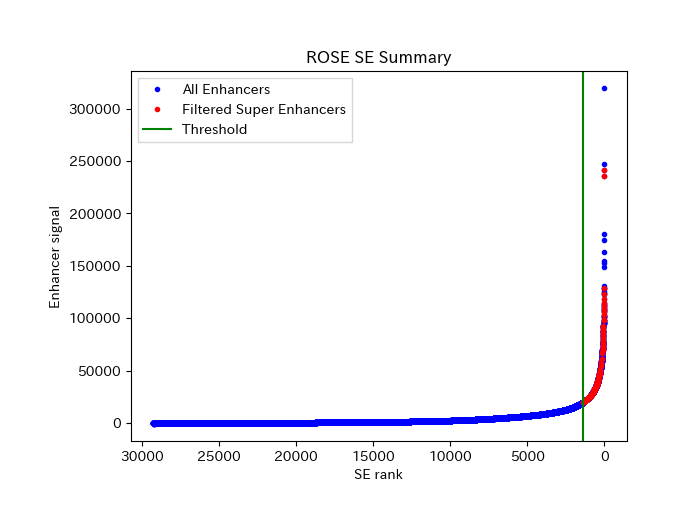

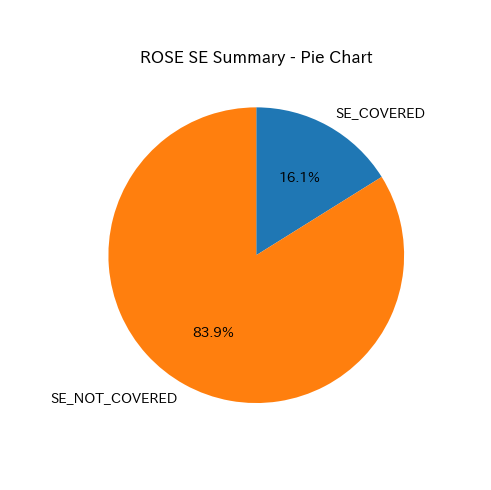

In [8]:
test_segene.create_ROSE_summary(save_text="./output/rose_se_filtered.txt")

## 3.4 Merged SE analysis

Now, let's check what the distribution of the extracted SEs looks like for the entire sample group.

### Overall situation analysis

First, we'll use the ``analyze_merge_SE()`` method to check whether there are any places where the filtered SEs for all the samples are accumulating.

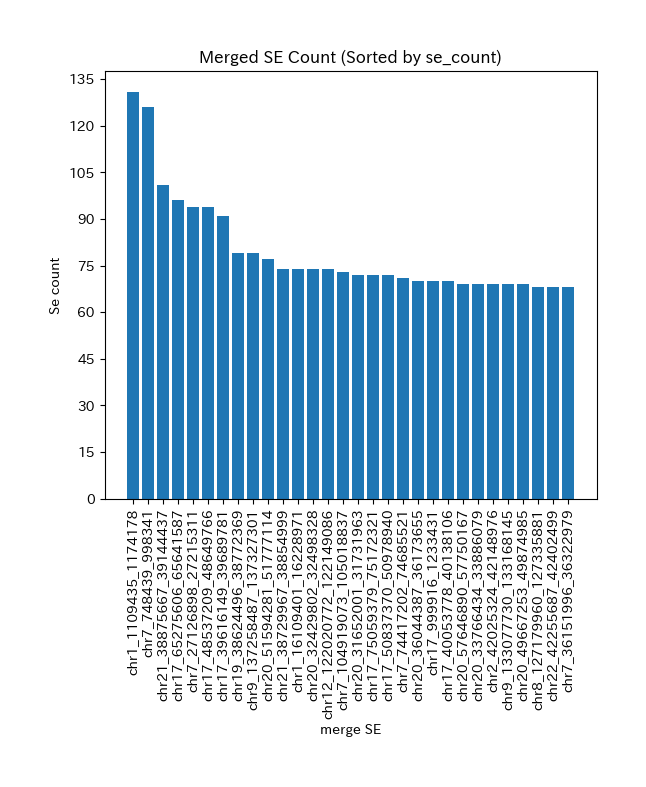

In [9]:
test_segene.analyze_merge_SE(
    save_sorted_tsv="./output/merge_SE.tsv", 
    graph_max_number=30,
    sort_by="se_count")

The results of sorting the merged SE by the order of the regions where the super enhancers are concentrated are displayed. You can also obtain the TSV of the sorted results. Let's examine the summary of the top-ranked entries in the list. Use ```display_sorted_df()``` to view the number of SEs, sample count, and a summary of genes concentrated in each region.

In [10]:
test_segene.display_sorted_df()

,se_data,se_count,sample_count,gene_list,gene_count,peak_list,peak_count,all_count
rank,,,,,,,,
1,chr1_1109435_1174178,131,65,"LOC148413, ATAD3A, NOC2L, TMEM52",4,"PeakID_178, PeakID_199, PeakID_208, PeakID_213",4,7
2,chr7_748439_998341,126,70,"CYP2W1, ADAP1, MAFK",3,"PeakID_448215, PeakID_683399, PeakID_448275, PeakID_819271, PeakID_448319, PeakID_448318, PeakID_448321, PeakID_448322, PeakID_448327, PeakID_448326, PeakID_448320",11,11
3,chr21_38875667_39144437,101,68,"ETS2, LOC102724740",2,"PeakID_314101, PeakID_314102, PeakID_314108, PeakID_314109, PeakID_314112, PeakID_636176, PeakID_636181, PeakID_314163, PeakID_636179",9,9
4,chr17_65275606_65641587,96,67,"AXIN2, LOC102724272",2,"PeakID_761541, PeakID_213877, PeakID_213886, PeakID_213880, PeakID_604932, PeakID_213888, PeakID_761540, PeakID_604934, PeakID_213894, PeakID_761572, PeakID_213895, PeakID_213896, PeakID_213893, PeakID_761563, PeakID_761564, PeakID_761562, PeakID_761555, PeakID_213844, PeakID_213843, PeakID_761543, PeakID_761542, PeakID_213892, PeakID_604933, PeakID_213905, PeakID_213889, PeakID_213897, PeakID_213913, PeakID_604928, PeakID_761573, PeakID_213878, PeakID_213883, PeakID_604929, PeakID_213876, PeakID_213872, PeakID_213866, PeakID_604925, PeakID_213858, PeakID_761561, PeakID_761554, PeakID_761539, PeakID_213842, PeakID_213841, PeakID_604937",43,66
5,chr7_27126898_27215311,94,74,"HOXA10-AS, HOXA11-AS, HOTTIP, HOXA11, HOXA6, HOXA5, HOXA9, HOXA10, HOXA7, HOXA2, HOXA-AS3, HOXA13, HOXA3",13,"PeakID_685201, PeakID_685207, PeakID_453470, PeakID_453468, PeakID_453467, PeakID_453528, PeakID_453488, PeakID_453469, PeakID_453527, PeakID_453466, PeakID_685211, PeakID_685209, PeakID_453477, PeakID_453526, PeakID_685221, PeakID_685222, PeakID_453521, PeakID_453507, PeakID_685208, PeakID_453529, PeakID_453530, PeakID_453502, PeakID_453496, PeakID_685225, PeakID_453514, PeakID_685226, PeakID_453513, PeakID_453505, PeakID_453517, PeakID_453504, PeakID_453516, PeakID_453523, PeakID_453515, PeakID_453431, PeakID_453473, PeakID_685202, PeakID_685212, PeakID_453465, PeakID_453457, PeakID_453558, PeakID_685218, PeakID_685229, PeakID_453544, PeakID_453531, PeakID_685227, PeakID_453539, PeakID_453497, PeakID_453541, PeakID_453545, PeakID_453486, PeakID_453485, PeakID_453506, PeakID_453538, PeakID_685217, PeakID_453482, PeakID_453559, PeakID_453564, PeakID_453560, PeakID_453542, PeakID_685224, PeakID_453534, PeakID_453456, PeakID_453461, PeakID_453540, PeakID_453553, PeakID_685204, PeakID_453458, PeakID_453565, PeakID_453572, PeakID_453566, PeakID_685237, PeakID_453567, PeakID_453562, PeakID_453533, PeakID_453537, PeakID_685236, PeakID_685228, PeakID_685220, PeakID_685210, PeakID_453434, PeakID_685216, PeakID_453478, PeakID_453519, PeakID_453475, PeakID_453464, PeakID_453495, PeakID_453492, PeakID_453569, PeakID_685230, PeakID_453462, PeakID_453459, PeakID_453563, PeakID_453543, PeakID_453474, PeakID_453549, PeakID_453568, PeakID_453570, PeakID_453561, PeakID_685234, PeakID_453479, PeakID_685233, PeakID_685231, PeakID_685232, PeakID_453503, PeakID_685206, PeakID_453548, PeakID_685205, PeakID_453481, PeakID_453547, PeakID_453554, PeakID_453557, PeakID_453552, PeakID_453508, PeakID_685235, PeakID_453555, PeakID_685238, PeakID_453524, PeakID_453494, PeakID_453546, PeakID_453510, PeakID_685190, PeakID_453480, PeakID_685215, PeakID_453472, PeakID_453453, PeakID_453476, PeakID_685199, PeakID_453452",128,470
6,chr17_48537209_48649766,94,69,"HOXB6, HOXB3, HOXB4, HOXB7, HOXB5, HOXB-AS3, HOXB9, HOXB8, LOC101060400",9,"PeakID_209278, PeakID_209257, PeakID_603675, PeakID_209266, PeakID_209263, PeakID_209304, PeakID_209234, PeakID_209272, PeakID_209274, PeakID_603678, PeakID_209340, PeakID_209269, PeakID_209291, PeakID_209296, PeakID_209319, PeakID_209294, PeakID_209248, PeakID_209342, PeakID_209256, PeakID_209298, PeakID_209300, PeakID_209320, PeakID_603671, PeakID_603680, PeakID_209275, PeakID_209333, PeakID_209285, PeakID_209268, PeakID_209336, PeakID_209264, PeakID_603679, PeakID_20923

The default setting is to sort by the number of SE, so the number of SE in each area is first counted.
On the other hand, it is also possible to sort by the number of samples in that SE area. This is done using the ```resort_sorted_df()``` method.

In [11]:
test_segene.resort_sorted_df(new_sort_key="sample_count")

Check the list again to see if the results have changed.

In [12]:
# Display of re-sorted data
test_segene.display_sorted_df()

,se_data,se_count,sample_count,gene_list,gene_count,peak_list,peak_count,all_count
rank,,,,,,,,
1,chr12_122020772_122149086,74,74,MLXIP,1,PeakID_127771,1,1
2,chr20_32429802_32498328,74,74,"POFUT1, TM9SF4, C20orf112, PLAGL2, BCL2L1, HM13",6,"PeakID_300757, PeakID_300755, PeakID_300756, PeakID_632034, PeakID_300766, PeakID_300759, PeakID_300753, PeakID_632035, PeakID_300760, PeakID_300752, PeakID_300758, PeakID_300767, PeakID_300747, PeakID_300751, PeakID_300749",15,39
3,chr7_27126898_27215311,94,74,"HOXA10-AS, HOXA11-AS, HOTTIP, HOXA11, HOXA6, HOXA5, HOXA9, HOXA10, HOXA7, HOXA2, HOXA-AS3, HOXA13, HOXA3",13,"PeakID_685201, PeakID_685207, PeakID_453470, PeakID_453468, PeakID_453467, PeakID_453528, PeakID_453488, PeakID_453469, PeakID_453527, PeakID_453466, PeakID_685211, PeakID_685209, PeakID_453477, PeakID_453526, PeakID_685221, PeakID_685222, PeakID_453521, PeakID_453507, PeakID_685208, PeakID_453529, PeakID_453530, PeakID_453502, PeakID_453496, PeakID_685225, PeakID_453514, PeakID_685226, PeakID_453513, PeakID_453505, PeakID_453517, PeakID_453504, PeakID_453516, PeakID_453523, PeakID_453515, PeakID_453431, PeakID_453473, PeakID_685202, PeakID_685212, PeakID_453465, PeakID_453457, PeakID_453558, PeakID_685218, PeakID_685229, PeakID_453544, PeakID_453531, PeakID_685227, PeakID_453539, PeakID_453497, PeakID_453541, PeakID_453545, PeakID_453486, PeakID_453485, PeakID_453506, PeakID_453538, PeakID_685217, PeakID_453482, PeakID_453559, PeakID_453564, PeakID_453560, PeakID_453542, PeakID_685224, PeakID_453534, PeakID_453456, PeakID_453461, PeakID_453540, PeakID_453553, PeakID_685204, PeakID_453458, PeakID_453565, PeakID_453572, PeakID_453566, PeakID_685237, PeakID_453567, PeakID_453562, PeakID_453533, PeakID_453537, PeakID_685236, PeakID_685228, PeakID_685220, PeakID_685210, PeakID_453434, PeakID_685216, PeakID_453478, PeakID_453519, PeakID_453475, PeakID_453464, PeakID_453495, PeakID_453492, PeakID_453569, PeakID_685230, PeakID_453462, PeakID_453459, PeakID_453563, PeakID_453543, PeakID_453474, PeakID_453549, PeakID_453568, PeakID_453570, PeakID_453561, PeakID_685234, PeakID_453479, PeakID_685233, PeakID_685231, PeakID_685232, PeakID_453503, PeakID_685206, PeakID_453548, PeakID_685205, PeakID_453481, PeakID_453547, PeakID_453554, PeakID_453557, PeakID_453552, PeakID_453508, PeakID_685235, PeakID_453555, PeakID_685238, PeakID_453524, PeakID_453494, PeakID_453546, PeakID_453510, PeakID_685190, PeakID_453480, PeakID_685215, PeakID_453472, PeakID_453453, PeakID_453476, PeakID_685199, PeakID_453452",128,470
4,chr21_38729967_38854999,74,74,ETS2,1,"PeakID_314033, PeakID_314052, PeakID_314034, PeakID_314053, PeakID_314054",5,5
5,chr1_16109401_16228971,74,74,"RSG1, ATP13A2, LOC101927546",3,"PeakID_5219, PeakID_5207, PeakID_5293",3,3
6,chr17_50837370_50978940,72,72,"RSAD1, TOB1-AS1",2,PeakID_210418,1,2
7,chr20_31652001_31731963,72,72,BCL2L1,1,PeakID_300477,1,1
8,chr7_74417202_74685521,71,71,NSUN5P1,1,PeakID_460594,1,1
9,chr19_38624496_38772369,79,71,EIF3K,1,"PeakID_613840, PeakID_243881",2,2


The samples have been reordered based on the specified criteria. You can visualize this new ordering in the graph below.

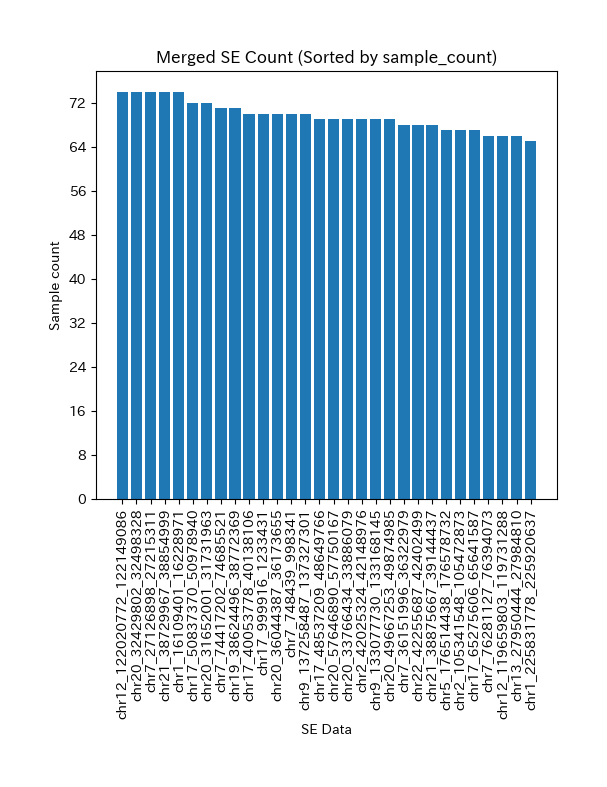

In [13]:
# Generate a graph based on the re-sorted data
test_segene.plot_sorted_se_count_graph(
    graph_max_number=30,
    save_svg="./output/resorted_se_count_graph.svg",
    save_and_show=True
)

We will re-sort sorted_df by SE number again.

In [14]:
test_segene.resort_sorted_df(new_sort_key="se_count")

Check that the samples have been re-sorted in the correct order.

In [15]:
# Display of re-sorted data
test_segene.display_sorted_df()

,se_data,se_count,sample_count,gene_list,gene_count,peak_list,peak_count,all_count
rank,,,,,,,,
1,chr1_1109435_1174178,131,65,"LOC148413, ATAD3A, NOC2L, TMEM52",4,"PeakID_178, PeakID_199, PeakID_208, PeakID_213",4,7
2,chr7_748439_998341,126,70,"CYP2W1, ADAP1, MAFK",3,"PeakID_448215, PeakID_683399, PeakID_448275, PeakID_819271, PeakID_448319, PeakID_448318, PeakID_448321, PeakID_448322, PeakID_448327, PeakID_448326, PeakID_448320",11,11
3,chr21_38875667_39144437,101,68,"ETS2, LOC102724740",2,"PeakID_314101, PeakID_314102, PeakID_314108, PeakID_314109, PeakID_314112, PeakID_636176, PeakID_636181, PeakID_314163, PeakID_636179",9,9
4,chr17_65275606_65641587,96,67,"AXIN2, LOC102724272",2,"PeakID_761541, PeakID_213877, PeakID_213886, PeakID_213880, PeakID_604932, PeakID_213888, PeakID_761540, PeakID_604934, PeakID_213894, PeakID_761572, PeakID_213895, PeakID_213896, PeakID_213893, PeakID_761563, PeakID_761564, PeakID_761562, PeakID_761555, PeakID_213844, PeakID_213843, PeakID_761543, PeakID_761542, PeakID_213892, PeakID_604933, PeakID_213905, PeakID_213889, PeakID_213897, PeakID_213913, PeakID_604928, PeakID_761573, PeakID_213878, PeakID_213883, PeakID_604929, PeakID_213876, PeakID_213872, PeakID_213866, PeakID_604925, PeakID_213858, PeakID_761561, PeakID_761554, PeakID_761539, PeakID_213842, PeakID_213841, PeakID_604937",43,66
5,chr7_27126898_27215311,94,74,"HOXA10-AS, HOXA11-AS, HOTTIP, HOXA11, HOXA6, HOXA5, HOXA9, HOXA10, HOXA7, HOXA2, HOXA-AS3, HOXA13, HOXA3",13,"PeakID_685201, PeakID_685207, PeakID_453470, PeakID_453468, PeakID_453467, PeakID_453528, PeakID_453488, PeakID_453469, PeakID_453527, PeakID_453466, PeakID_685211, PeakID_685209, PeakID_453477, PeakID_453526, PeakID_685221, PeakID_685222, PeakID_453521, PeakID_453507, PeakID_685208, PeakID_453529, PeakID_453530, PeakID_453502, PeakID_453496, PeakID_685225, PeakID_453514, PeakID_685226, PeakID_453513, PeakID_453505, PeakID_453517, PeakID_453504, PeakID_453516, PeakID_453523, PeakID_453515, PeakID_453431, PeakID_453473, PeakID_685202, PeakID_685212, PeakID_453465, PeakID_453457, PeakID_453558, PeakID_685218, PeakID_685229, PeakID_453544, PeakID_453531, PeakID_685227, PeakID_453539, PeakID_453497, PeakID_453541, PeakID_453545, PeakID_453486, PeakID_453485, PeakID_453506, PeakID_453538, PeakID_685217, PeakID_453482, PeakID_453559, PeakID_453564, PeakID_453560, PeakID_453542, PeakID_685224, PeakID_453534, PeakID_453456, PeakID_453461, PeakID_453540, PeakID_453553, PeakID_685204, PeakID_453458, PeakID_453565, PeakID_453572, PeakID_453566, PeakID_685237, PeakID_453567, PeakID_453562, PeakID_453533, PeakID_453537, PeakID_685236, PeakID_685228, PeakID_685220, PeakID_685210, PeakID_453434, PeakID_685216, PeakID_453478, PeakID_453519, PeakID_453475, PeakID_453464, PeakID_453495, PeakID_453492, PeakID_453569, PeakID_685230, PeakID_453462, PeakID_453459, PeakID_453563, PeakID_453543, PeakID_453474, PeakID_453549, PeakID_453568, PeakID_453570, PeakID_453561, PeakID_685234, PeakID_453479, PeakID_685233, PeakID_685231, PeakID_685232, PeakID_453503, PeakID_685206, PeakID_453548, PeakID_685205, PeakID_453481, PeakID_453547, PeakID_453554, PeakID_453557, PeakID_453552, PeakID_453508, PeakID_685235, PeakID_453555, PeakID_685238, PeakID_453524, PeakID_453494, PeakID_453546, PeakID_453510, PeakID_685190, PeakID_453480, PeakID_685215, PeakID_453472, PeakID_453453, PeakID_453476, PeakID_685199, PeakID_453452",128,470
6,chr17_48537209_48649766,94,69,"HOXB6, HOXB3, HOXB4, HOXB7, HOXB5, HOXB-AS3, HOXB9, HOXB8, LOC101060400",9,"PeakID_209278, PeakID_209257, PeakID_603675, PeakID_209266, PeakID_209263, PeakID_209304, PeakID_209234, PeakID_209272, PeakID_209274, PeakID_603678, PeakID_209340, PeakID_209269, PeakID_209291, PeakID_209296, PeakID_209319, PeakID_209294, PeakID_209248, PeakID_209342, PeakID_209256, PeakID_209298, PeakID_209300, PeakID_209320, PeakID_603671, PeakID_603680, PeakID_209275, PeakID_209333, PeakID_209285, PeakID_209268, PeakID_209336, PeakID_209264, PeakID_603679, PeakID_20923

### Analysis of SE accumulation in a specific merge SE region

Let's assume that we are focusing on the rank2 chr7_748439_998341 region. Let's take a closer look at the SE accumulation in this region. To do this, we will specify the SE to be investigated in rank order.

In [16]:
test_segene.select_se_region(2)

This 2 indicates the rank number on the dataframe displayed earlier. This means that the current survey target is rank 2. Now, let's take a closer look at the SE distribution in this area.

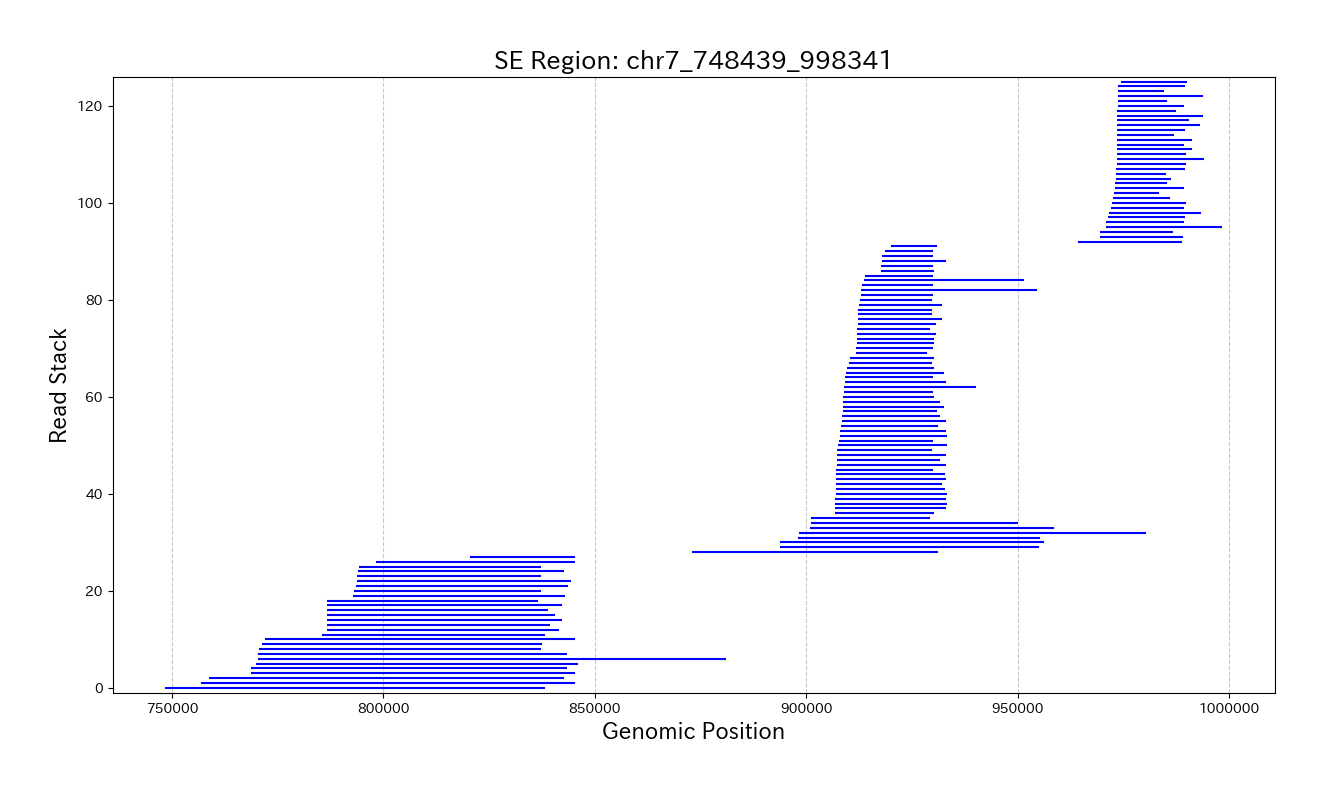

In [17]:
test_segene.visualize_selected_se_region()

As you can see, there is a layered accumulation of SE in the area.

## 3.5 Network Analysis

The merge SE region is a cluster of multiple SEs. From this situation, we can construct a three-layered network structure by connecting the merge SE region, the enhancer peaks that exist in that region, and the genes that correlate with those peaks. Let's take a look at this network structure.

### Drawing the entire network

First, we will construct the network structure.

In [18]:
test_segene.create_network(
        threshold = 10,                  # The node is the merged SE region where there is an SE in 10 or more samples.
        network_FDR = 0.05,　　　　　　　# The FDR threshold is the same as before.
        network_r = 0.4,                 # To check the network more widely, the threshold for r is set to 0.4 or higher.
        save_subgraph_info = True        # The CSV data for the subgraph is saved in the output folder.
)

First, let's try saving the entire network as an svg.

In [19]:
test_segene.draw_network()

This operation will save a file called network_FDR0.05_r0.4_threshold10.svg in the ./output/ directory as the default setting.

### Subnetwork Search

You can see the entire network by looking at the svg file you saved earlier, but you can also see individual subnetworks (merge SE and enhancer, gene connections).

Here, we will look at the subnetwork related to chr7_748439_998341, which we extracted earlier. In fact, it is possible to extract subnetworks by directly specifying this SE name, but here we will try searching from genes.

In chr7_748439_998341, _CYP2W1, ADAP1, and MAFK_ were related as genes. Search for _ADAP1_.

In [27]:
test_segene.search_subnetwork(name="ADAP1", node_type="gene")

This command fixes the current subgraph being investigated to include ADAP1. Let's take a look at the information for the selected subgraph.
The graph is drawn using display_subgraph. The seed is normally random, but by fixing it, you can call up the same graph.

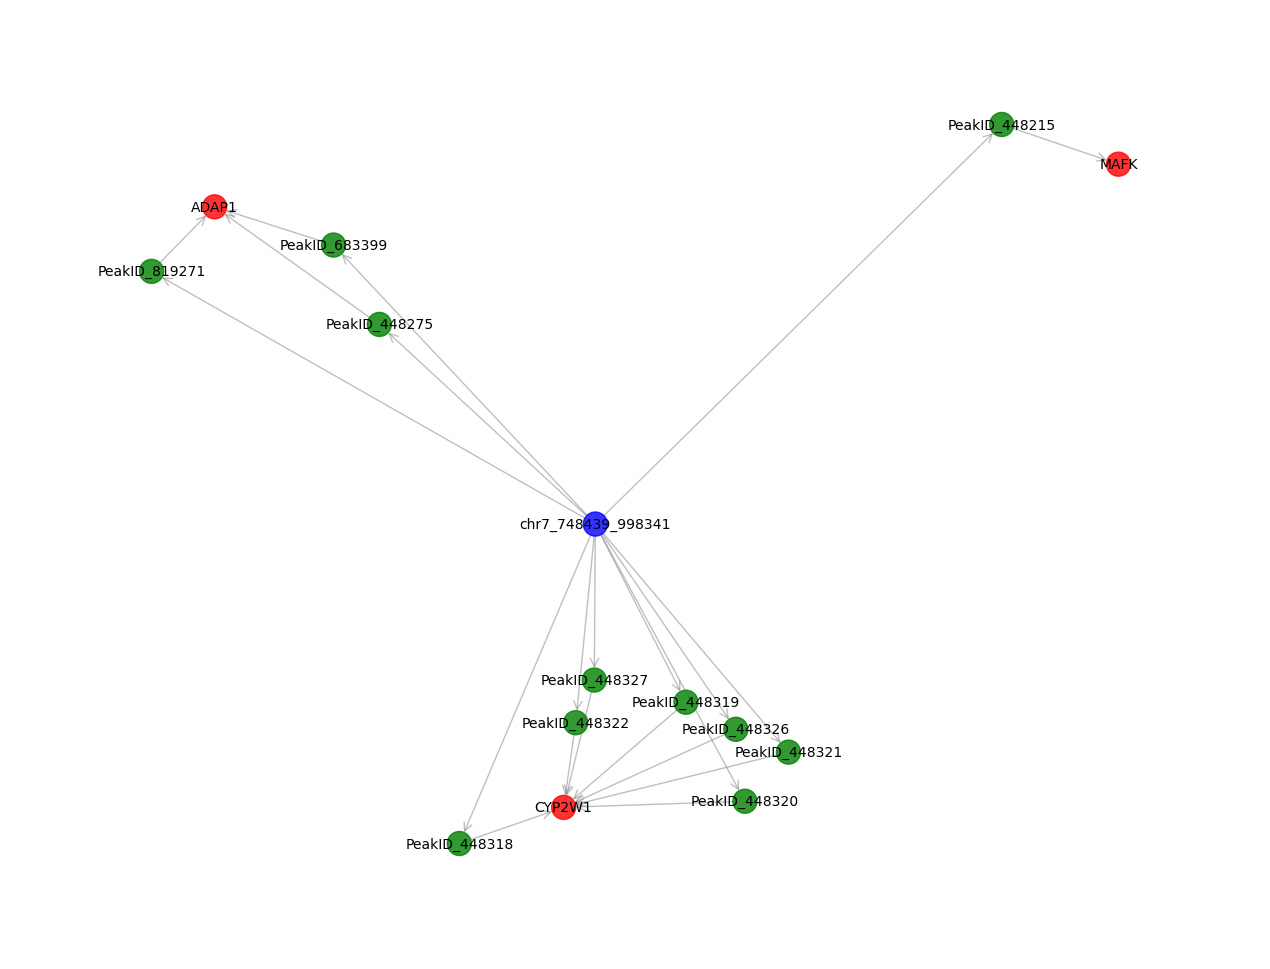

In [32]:
test_segene.display_subgraph(seed=84127)